In [1]:
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
import pandas as pd
import matplotlib.pyplot as plt
from dataset import *
from evaluation import *
from train import *
from models import *

from transformers import logging
logging.set_verbosity_error()
import warnings
warnings.filterwarnings('ignore')

## 一. Data inspection: 检查distribution

<AxesSubplot:xlabel='label'>

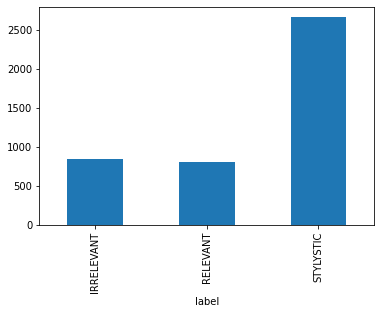

In [3]:
datapath = '../generated_data/similar_sentences2.xlsx'
df = pd.read_excel(datapath)
df.groupby(['label']).size().plot.bar()

## 二. bert tokenizer demo

In [3]:
from transformers import BertTokenizer
from transformers import RobertaTokenizer
#tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
example_text = 'I will watch Memento tonight'
bert_input = tokenizer(example_text, example_text ,padding='max_length', max_length = 20, 
                       truncation=True, return_tensors="pt")

In [6]:
example_text = tokenizer.decode(bert_input.input_ids[0])
example_text

'[CLS] i will watch memento tonight [SEP] i will watch memento tonight [SEP] [PAD] [PAD] [PAD] [PAD] [PAD]'

## 三. Data set: 数据集

In [2]:
train_dataloader, val_dataloader, test_dataloader = get_dataloader(df, tokenizer='nlpaueb/legal-bert-base-uncased')

train: 3439 val: 430 test: 430


## 四. Model: 模型

In [6]:
# Load the model
#pretrain = 'nlpaueb/legal-bert-base-uncased'
#pretrain = 'bert-base-uncased'
#model = BertClassifier(pretrain = pretrain)
model = RobertaClassifier()

## 五. Training: 训练

In [7]:
EPOCHS = 4
LR = 1e-6
              
train(model, train_dataloader, val_dataloader, LR, EPOCHS)

# Save the model
model_name = 'roberta-base_{}.pt'.format(EPOCHS)
torch.save(model.state_dict(), 'models/' + model_name)

100%|██████████| 215/215 [01:15<00:00,  2.83it/s]


Epochs: 1 | Train Loss:  0.048                 | Train Accuracy:  0.625                 | Val Loss:  0.032                 | Val Accuracy:  0.835


100%|██████████| 215/215 [01:15<00:00,  2.86it/s]


Epochs: 2 | Train Loss:  0.018                 | Train Accuracy:  0.934                 | Val Loss:  0.014                 | Val Accuracy:  0.937


100%|██████████| 215/215 [01:15<00:00,  2.85it/s]


Epochs: 3 | Train Loss:  0.009                 | Train Accuracy:  0.965                 | Val Loss:  0.012                 | Val Accuracy:  0.937


100%|██████████| 215/215 [01:15<00:00,  2.85it/s]


Epochs: 4 | Train Loss:  0.007                 | Train Accuracy:  0.976                 | Val Loss:  0.010                 | Val Accuracy:  0.947


## 六. Evaluation: 测试

In [8]:
# Load the model
#model = BertClassifier(pretrain = pretrain)
model = RobertaClassifier()
model.load_state_dict(torch.load('models/' + model_name))
evaluate(model, test_dataloader)

Test Accuracy:  0.944
Test F1:  0.918
Test Precision:  0.946
Test Recall:  0.913


In [8]:
train(model, train_dataloader, val_dataloader, LR, 6)

100%|██████████| 215/215 [01:15<00:00,  2.85it/s]


Epochs: 1 | Train Loss:  0.020                 | Train Accuracy:  0.913                 | Val Loss:  0.019                 | Val Accuracy:  0.919


100%|██████████| 215/215 [01:15<00:00,  2.86it/s]


Epochs: 2 | Train Loss:  0.016                 | Train Accuracy:  0.946                 | Val Loss:  0.016                 | Val Accuracy:  0.935


100%|██████████| 215/215 [01:15<00:00,  2.84it/s]


Epochs: 3 | Train Loss:  0.013                 | Train Accuracy:  0.960                 | Val Loss:  0.013                 | Val Accuracy:  0.960


100%|██████████| 215/215 [01:15<00:00,  2.84it/s]


Epochs: 4 | Train Loss:  0.010                 | Train Accuracy:  0.974                 | Val Loss:  0.010                 | Val Accuracy:  0.965


100%|██████████| 215/215 [01:15<00:00,  2.85it/s]


Epochs: 5 | Train Loss:  0.008                 | Train Accuracy:  0.979                 | Val Loss:  0.008                 | Val Accuracy:  0.981


100%|██████████| 215/215 [01:15<00:00,  2.86it/s]


Epochs: 6 | Train Loss:  0.006                 | Train Accuracy:  0.986                 | Val Loss:  0.008                 | Val Accuracy:  0.972


In [9]:
evaluate(model, test_dataloader)

Test Accuracy:  0.960
Test F1:  0.940
Test Precision:  0.944
Test Recall:  0.949


In [10]:
torch.save(model.state_dict(), 'models/' + 'legal_bert_{}.pt'.format(10))

In [9]:
torch.save(model.state_dict(), 'models/' + 'roberta_{}.pt'.format(10))